In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train_df = pd.read_csv("titanic/train.csv", index_col=0)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
test_df = pd.read_csv("titanic/test.csv", index_col=0)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [16]:
test_results_df = pd.read_csv("titanic/gender_submission.csv", index_col=0)
test_results_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [17]:
train_df.shape, test_df.shape, test_results_df.shape

((891, 11), (418, 10), (418, 1))

In [18]:
full_train_df = train_df
train_results_df = full_train_df[["Survived"]]
train_df = train_df.drop("Survived", axis=1)

In [19]:
full_train_df.shape, train_df.shape, train_results_df.shape

((891, 11), (891, 10), (891, 1))

In [22]:
train_df.keys()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train_df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [27]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [28]:
train_df["Gen"] = train_df["Sex"] == 'male'
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False


In [29]:
from sklearn.preprocessing import LabelBinarizer

In [30]:
train_df["Gen"] = LabelBinarizer().fit_transform(train_df["Sex"] )
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [31]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"] )
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,2,1
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,2,0


In [35]:
train_df["Cabin"].unique().size,  train_df["Cabin"].unique()

(148,
 array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63

In [37]:
train_df["Cabin"] = train_df["Cabin"].astype(np.str_).str[0]
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,2,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,2,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,2,1
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,n,2,1
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,2,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,n,2,0


In [40]:
plt.rcParams["figure.figsize"]

[6.4, 4.8]

In [43]:
plt.rcParams["figure.figsize"] = [16, 4.8]

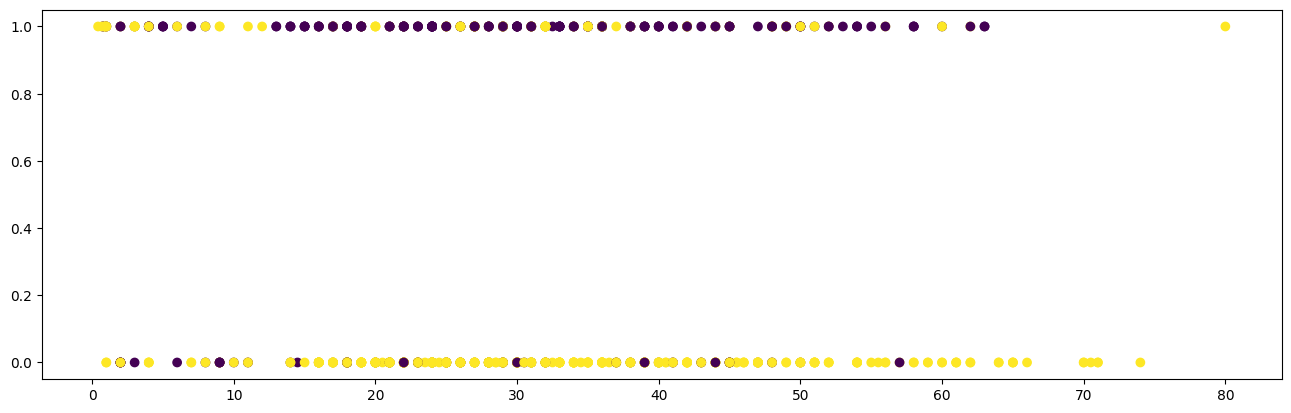

In [44]:

plt.scatter(train_df['Age'], train_results_df['Survived'], c=train_df['Gen']);


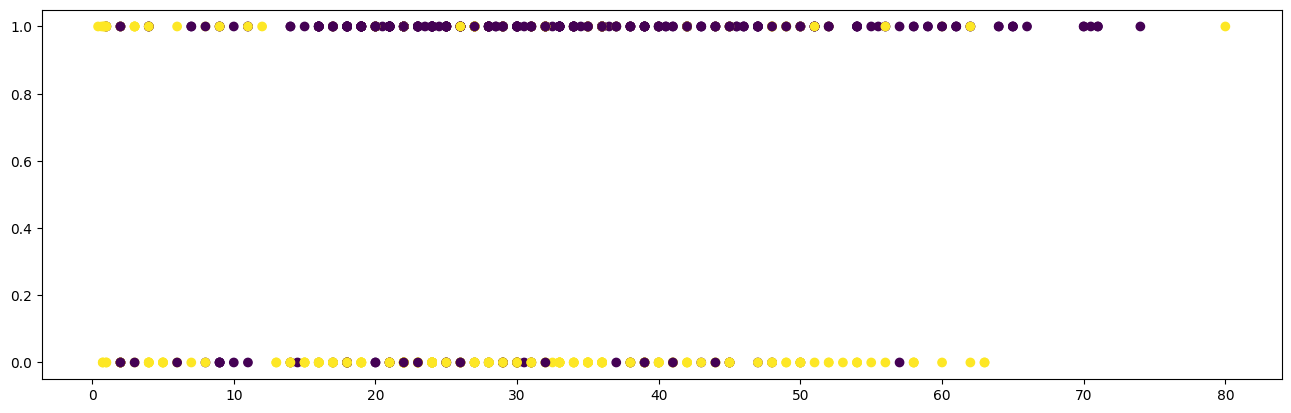

In [45]:
plt.scatter(train_df['Age'], train_df['Gen'], c= train_results_df['Survived'] );


In [47]:
train_df["Cabin"] = LabelEncoder().fit_transform(train_df["Cabin"] )
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,8,2,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,8,2,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,8,2,1
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,2,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,8,2,0


In [49]:
matrix_train_df = train_df[["Pclass", "Age",	"SibSp",	"Parch", "Fare", "Cabin", "Embarked", "Gen" ]]
matrix_train_df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,8,2,1
2,1,38.0,1,0,71.2833,2,0,0
3,3,26.0,0,0,7.9250,8,2,0
4,1,35.0,1,0,53.1000,2,2,0
5,3,35.0,0,0,8.0500,8,2,1
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,8,2,1
888,1,19.0,0,0,30.0000,1,2,0
889,3,NaN,1,2,23.4500,8,2,0


In [50]:
matrix_train_df.corr()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gen
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.746616,0.157112,0.131900
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.267270,-0.025252,0.093254
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.041540,0.066654,-0.114631
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.032548,0.038322,-0.245489
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.523013,-0.221226,-0.182333
Cabin,0.746616,-0.267270,0.041540,-0.032548,-0.523013,1.000000,0.187015,0.123076
Embarked,0.157112,-0.025252,0.066654,0.038322,-0.221226,0.187015,1.000000,0.104057
Gen,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.123076,0.104057,1.000000


# pip install seaborn

In [51]:
import seaborn as sns

In [56]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]

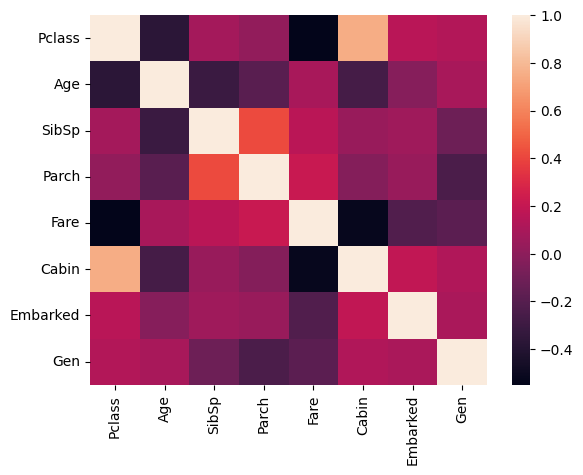

In [57]:
sns.heatmap(matrix_train_df.corr());

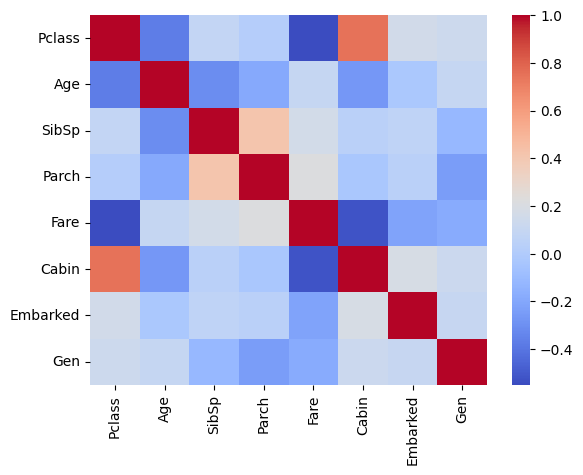

In [58]:
sns.heatmap(matrix_train_df.corr(),cmap="coolwarm");

/var/folders/93/qw471b_96px9kvlzs8__bk480000gn/T/ipykernel_51302/721027081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_train_df["Survived"] = train_results_df["Survived"]


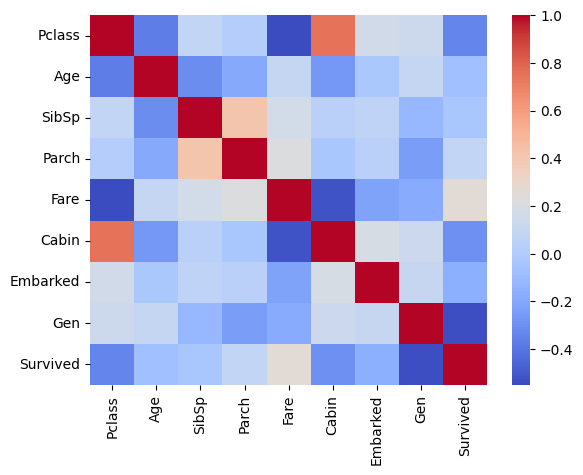

In [60]:
matrix_train_df["Survived"] = train_results_df["Survived"]
sns.heatmap(matrix_train_df.corr(),cmap="coolwarm");

# Scalare

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaled_matrix_train_df = StandardScaler().fit_transform(matrix_train_df)
scaled_matrix_train_df = pd.DataFrame(scaled_matrix_train_df, columns=matrix_train_df.keys())
scaled_matrix_train_df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gen,Survived
0,0.827377,-0.530377,0.432793,-0.473674,-0.502445,0.522067,0.581114,0.737695,-0.789272
1,-1.566107,0.571831,0.432793,-0.473674,0.786845,-1.917594,-1.938460,-1.355574,1.266990
2,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,0.522067,0.581114,-1.355574,1.266990
3,-1.566107,0.365167,0.432793,-0.473674,0.420730,-1.917594,0.581114,-1.355574,1.266990
4,0.827377,0.365167,-0.474545,-0.473674,-0.486337,0.522067,0.581114,0.737695,-0.789272
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671,0.522067,0.581114,0.737695,-0.789272
887,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381,-2.324204,0.581114,-1.355574,1.266990
888,0.827377,NaN,0.432793,2.008933,-0.176263,0.522067,0.581114,-1.355574,-0.789272
889,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381,-1.917594,-1.938460,0.737695,1.266990


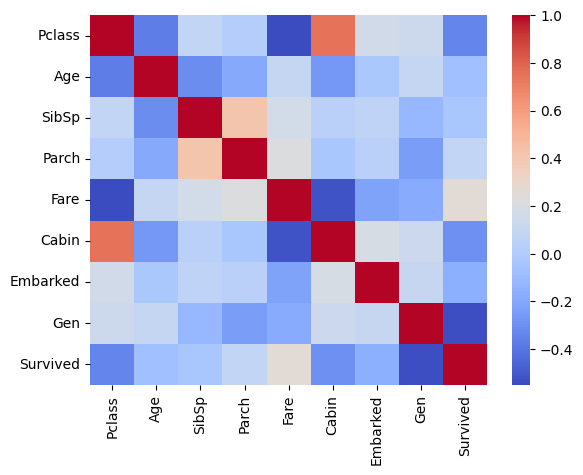

In [63]:
sns.heatmap(scaled_matrix_train_df.corr(),cmap="coolwarm");

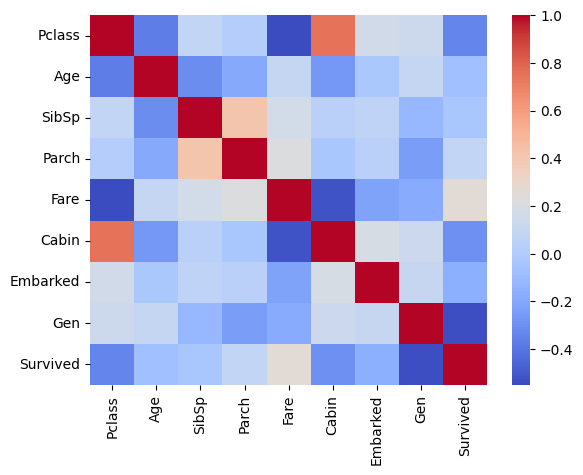

In [64]:
sns.heatmap(matrix_train_df.corr(),cmap="coolwarm");